In [1]:
import pandas as pd
import numpy as np

In [2]:
from pylift import TransformedOutcome

In [3]:
df = pd.read_csv("../criteo_data/criteo-uplift-v2.1.csv")

# Look at data

In [4]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979587,26.297764,10.059654,9.006250,4.679882,10.280525,4.115453,-3.282109,4.833815,3.839578,13.190056,5.300375,-0.168679,1,0,0,0
13979588,12.642207,10.679513,8.214383,-1.700105,10.280525,3.013064,-13.955150,6.269026,3.971858,13.190056,5.300375,-0.168679,1,0,0,1
13979589,12.976557,10.059654,8.381868,0.842442,11.029584,4.115453,-8.281971,4.833815,3.779212,23.570168,6.169187,-0.168679,1,0,1,0
13979590,24.805064,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0


In [5]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979587,26.297764,10.059654,9.006250,4.679882,10.280525,4.115453,-3.282109,4.833815,3.839578,13.190056,5.300375,-0.168679,1,0,0,0
13979588,12.642207,10.679513,8.214383,-1.700105,10.280525,3.013064,-13.955150,6.269026,3.971858,13.190056,5.300375,-0.168679,1,0,0,1
13979589,12.976557,10.059654,8.381868,0.842442,11.029584,4.115453,-8.281971,4.833815,3.779212,23.570168,6.169187,-0.168679,1,0,1,0
13979590,24.805064,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0


# EDA

In [6]:
df['treatment'].value_counts(normalize=True)

1    0.85
0    0.15
Name: treatment, dtype: float64

In [10]:
df[["treatment","exposure","conversion"]].groupby(by = "treatment").agg("mean")

,exposure,conversion
treatment,,
0,0.000000,0.001938
1,0.036037,0.003089


In [14]:
df.groupby(by = ["treatment","exposure"]).agg("mean")[["conversion"]]

conversion
treatment exposure            
0         0           0.001938
1         0           0.001194
          1           0.053784

# Sampling of all data

In [15]:
from sklearn.model_selection import train_test_split

In [32]:
# 1 percent of data
X_data = df.drop(columns = ["conversion"])
y_data = df[["conversion"]]
_, X_sample, _, y_sample = train_test_split(X_data, y_data, test_size = 0.01, random_state = 0, stratify = X_data[["treatment"]])

In [33]:
X_sample.shape

(139796, 15)

In [34]:
y_sample.shape

(139796, 1)

In [36]:
X_sample.to_csv("./data/sampled_X.csv")
y_sample.to_csv("./data/sampled_y.csv")

In [42]:
small_df = pd.merge(left = X_sample, right = y_sample, left_index = True, right_index = True )

In [43]:
small_df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,visit,exposure,conversion
10747555,26.695171,10.059654,8.915571,4.679882,10.280525,4.115453,-8.693224,4.833815,3.864711,13.190056,5.300375,-0.168679,1,1,0,0
7824856,12.616365,10.059654,8.949841,4.679882,10.280525,4.115453,0.294443,4.833815,3.927254,13.190056,5.300375,-0.168679,1,0,0,0
9511737,16.014395,10.059654,8.214383,3.907662,10.280525,4.115453,-8.693224,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
759604,26.546511,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
5473452,22.682404,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10530516,12.616365,10.059654,8.227558,4.679882,10.280525,4.115453,0.294443,4.833815,3.737662,47.893368,5.300375,-0.168679,1,1,0,0
3653068,12.616365,10.059654,9.003076,4.679882,10.280525,4.115453,0.294443,4.833815,3.934656,13.190056,5.300375,-0.168679,1,0,0,0
11892,12.736174,10.059654,8.215430,0.028363,10.280525,4.115453,-14.733816,4.833815,3.803645,34.832200,5.300375,-0.168679,1,1,1,0
1295292,21.617733,10.059654,8.214383,4.679882,10.280525,3.013064,-12.781218,9.921814,3.971858,13.190056,5.300375,-0.168679,1,0,0,0


In [44]:
small_df.shape

(139796, 16)

In [47]:
small_df["treatment"].value_counts(normalize = True)

1    0.850003
0    0.149997
Name: treatment, dtype: float64

In [48]:
up = TransformedOutcome(
    small_df.drop(columns = ["visit", "exposure"]), 
    col_treatment = 'treatment',
    col_outcome = "conversion",
    stratify = small_df['treatment']
)

<AxesSubplot:xlabel='NIV', ylabel='Features'>

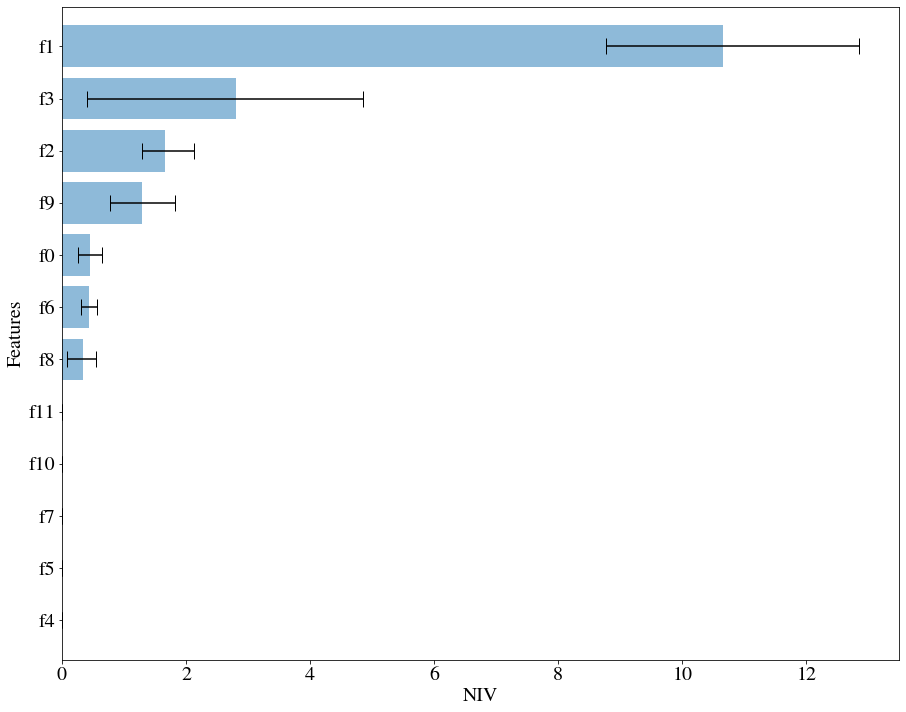

In [49]:
np.random.seed(0)
up.NIV()

<AxesSubplot:title={'center':'NWOE by bin for f11'}, xlabel='Bin Interval'>

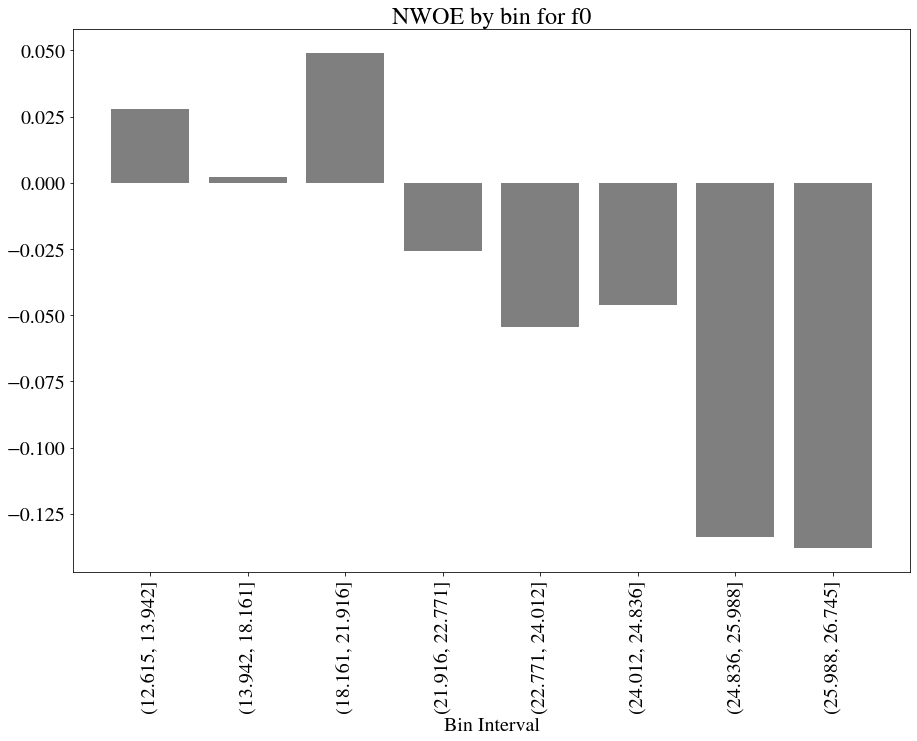

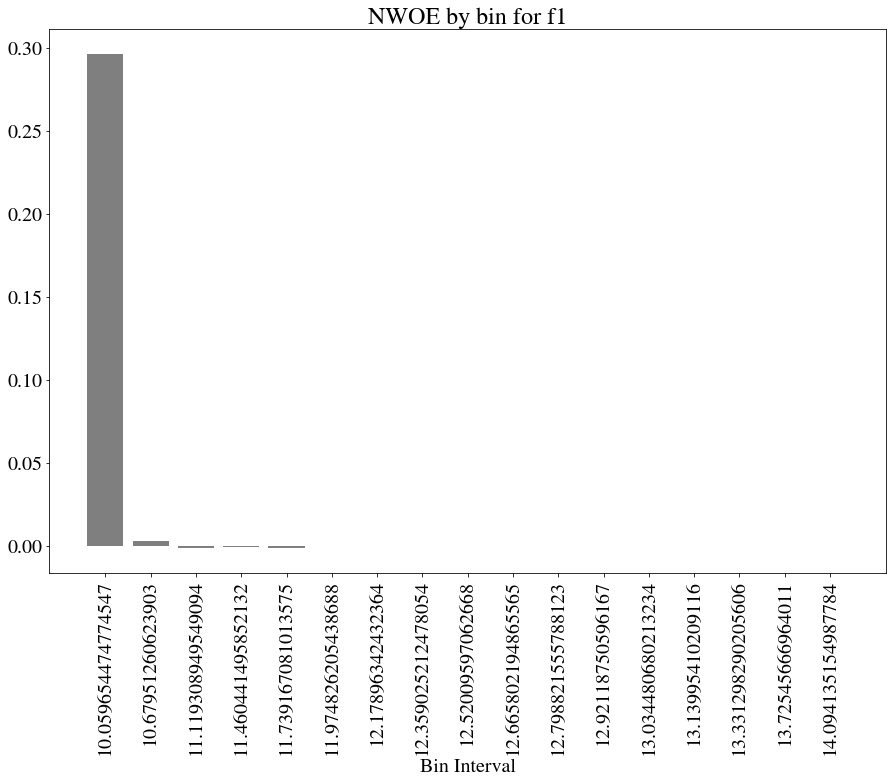

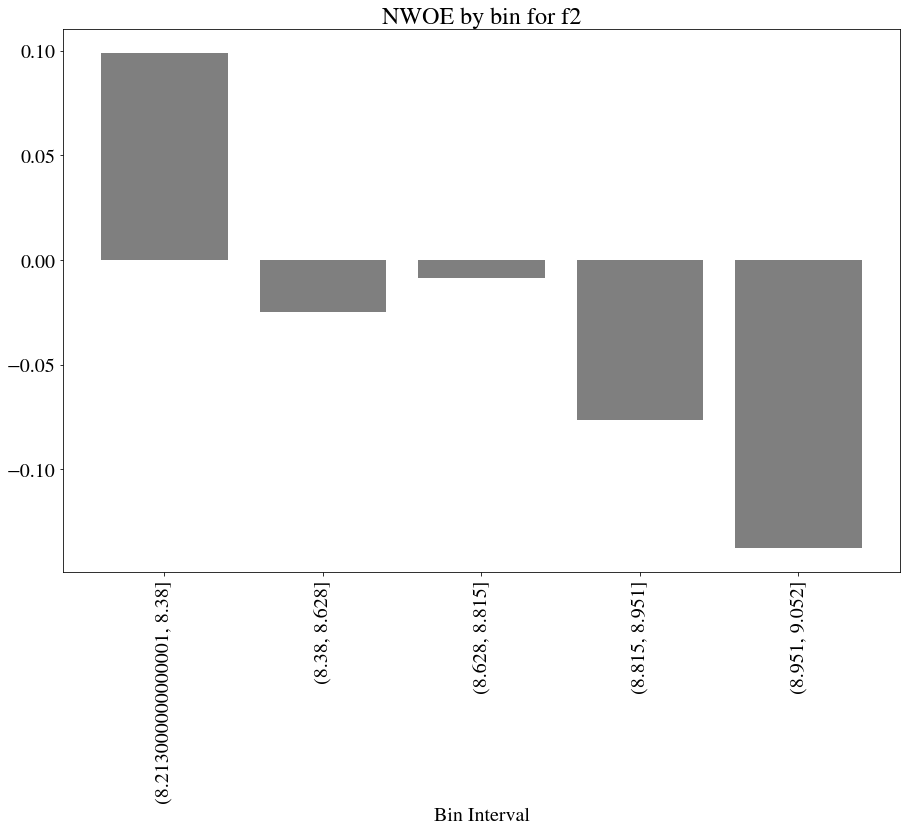

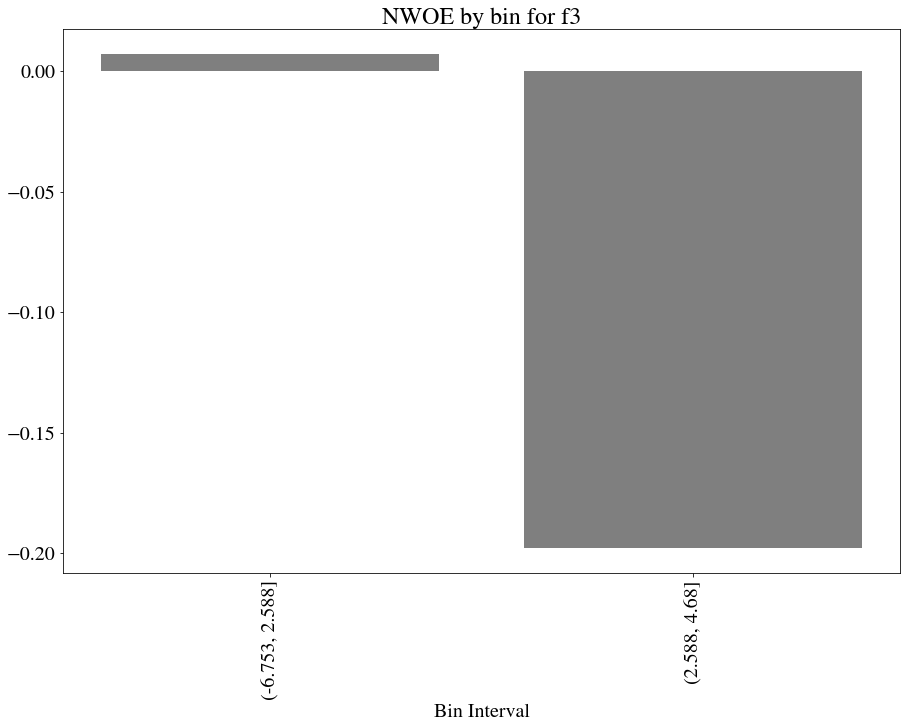

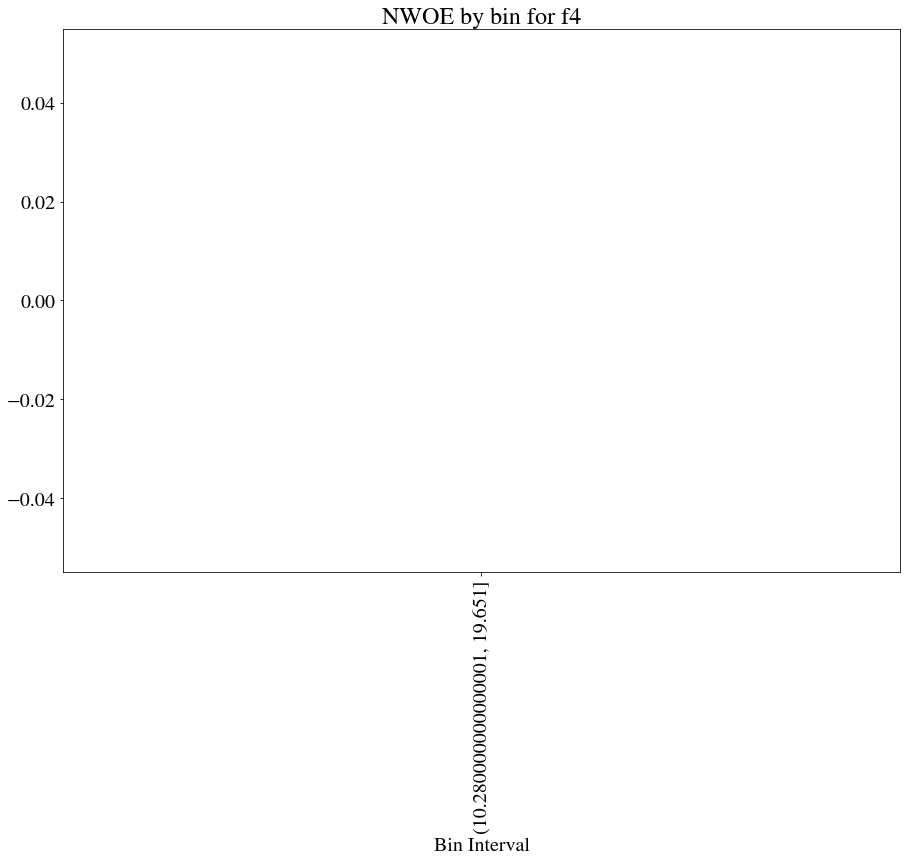

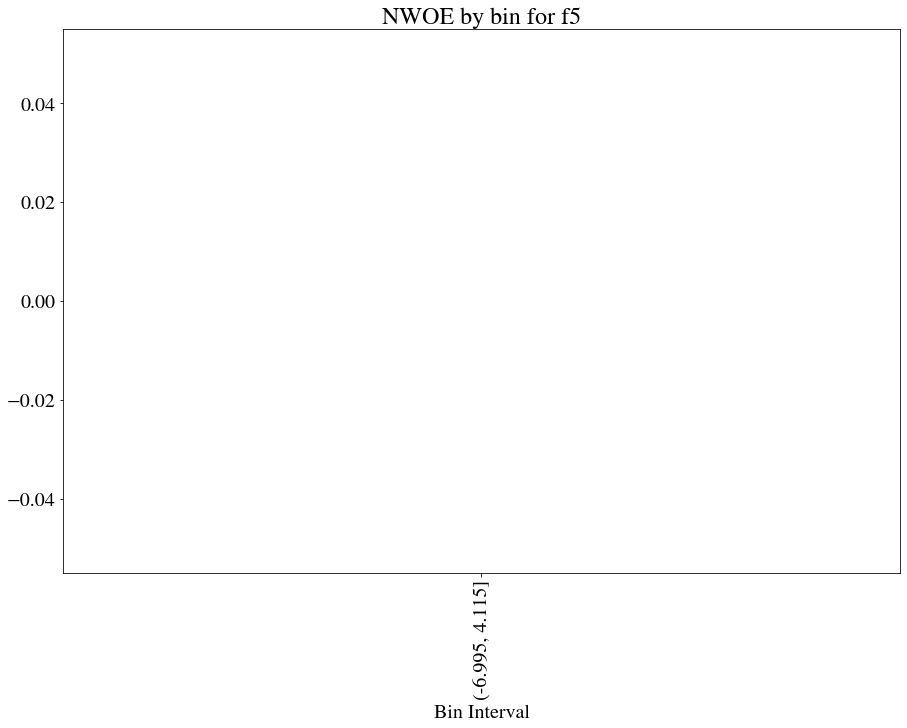

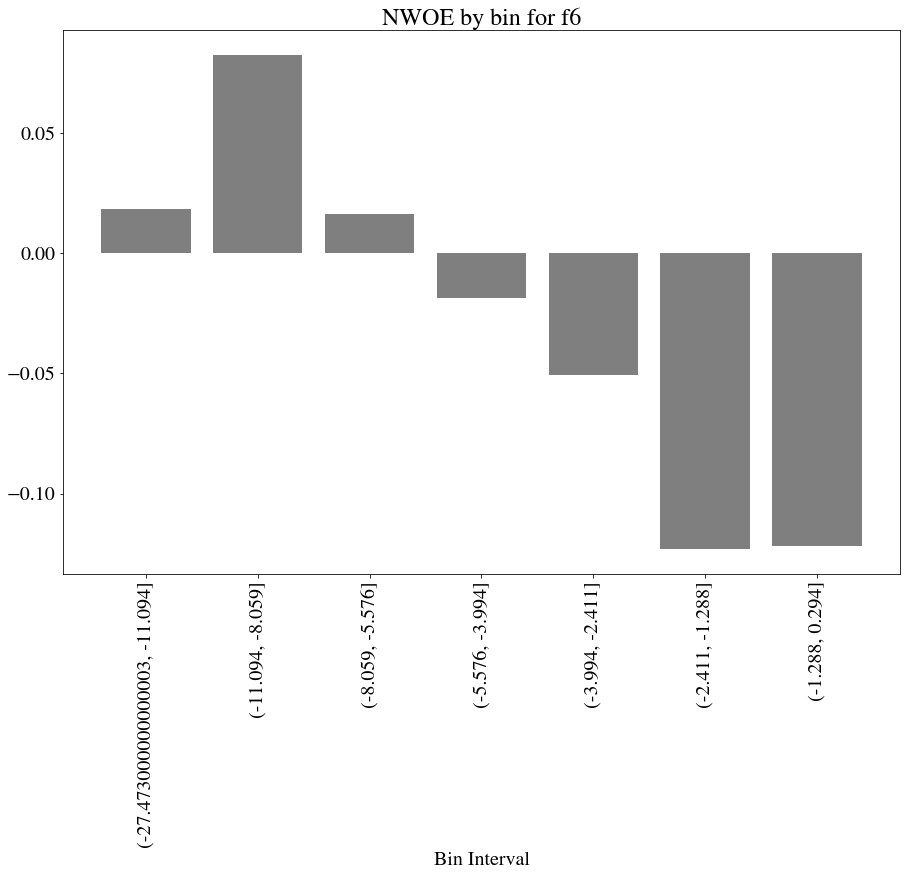

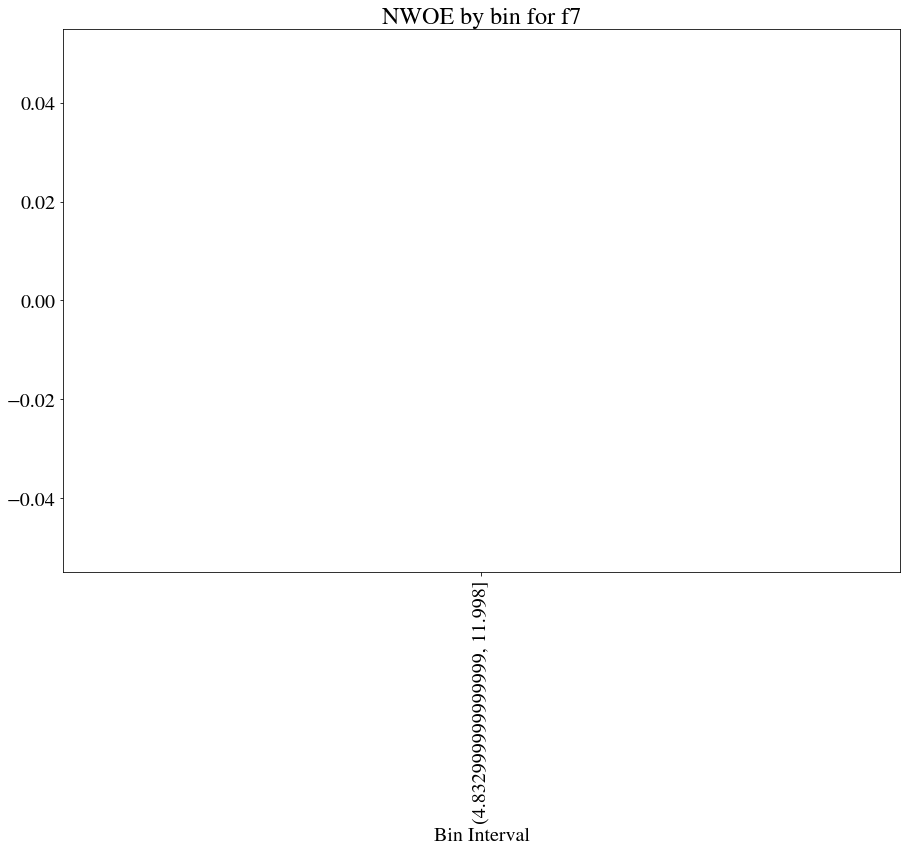

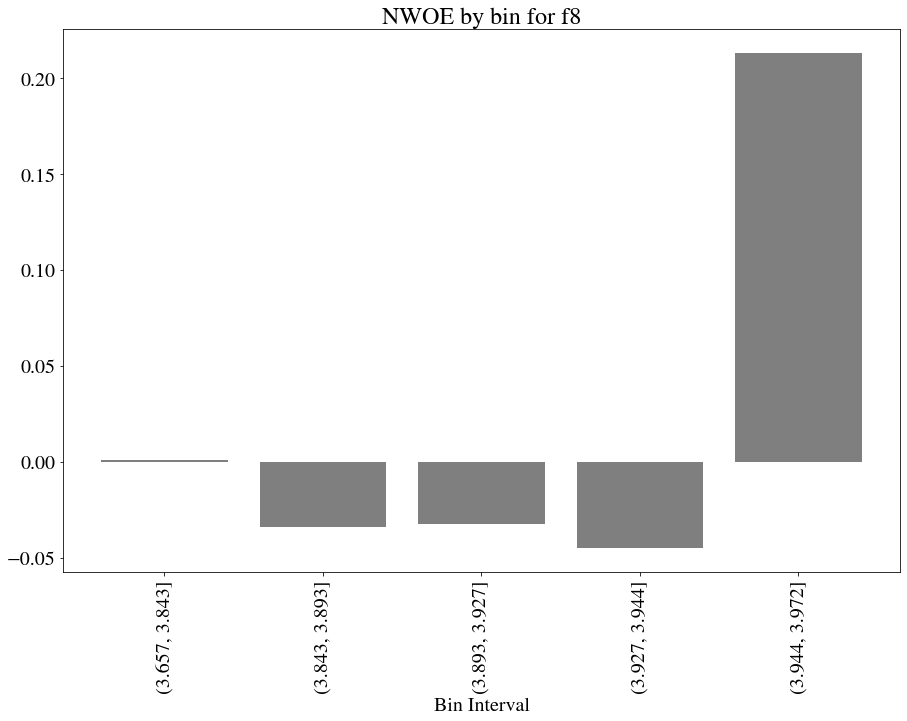

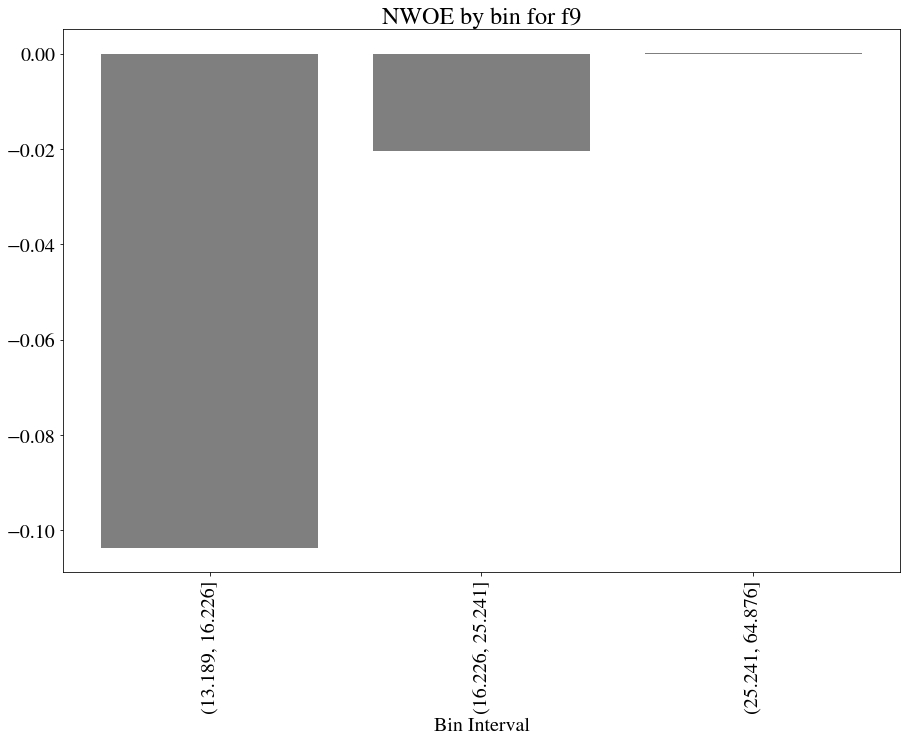

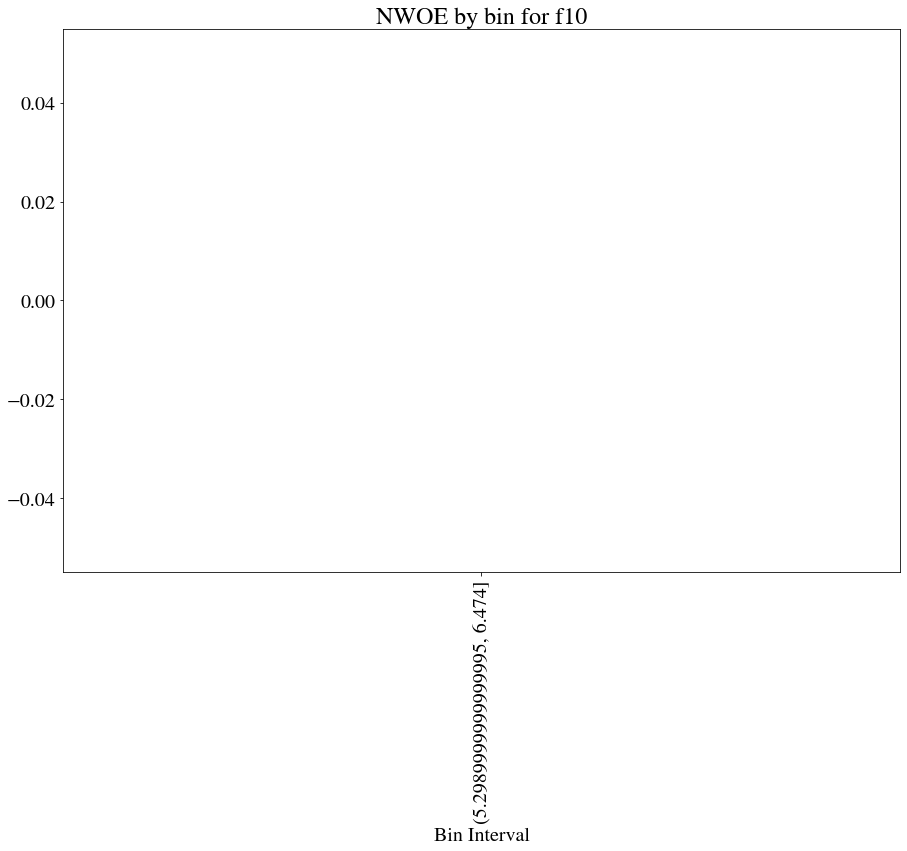

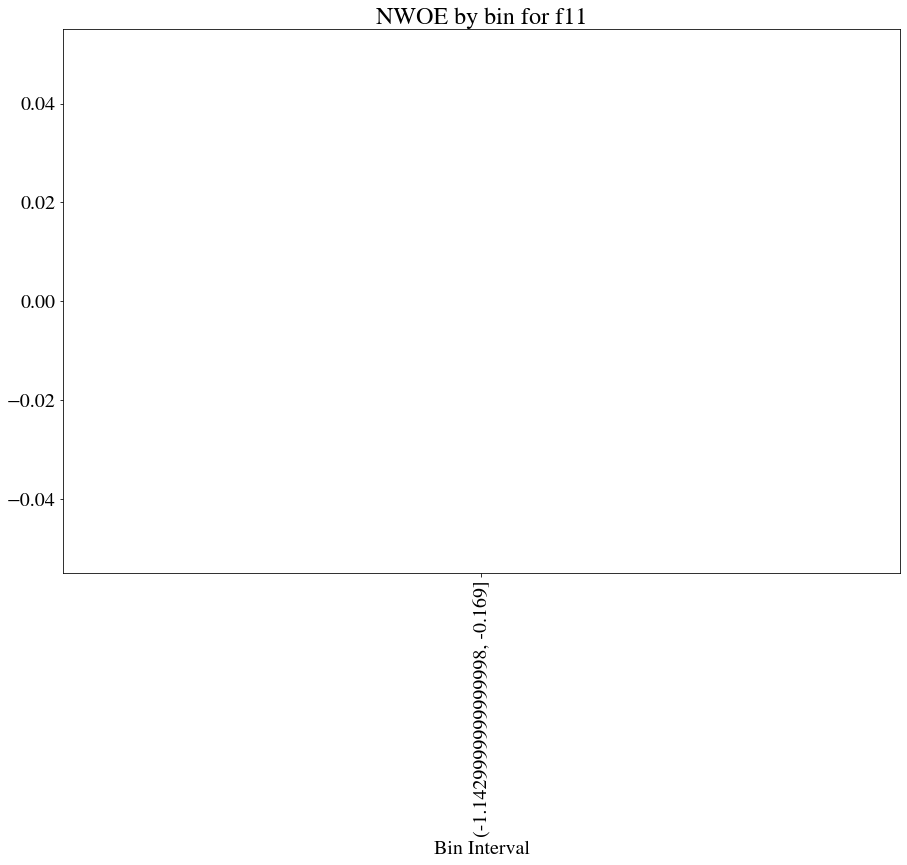

In [50]:
up.NWOE()

In [51]:
up.randomized_search(n_iter = 5, n_jobs = -1, random_state = 0)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      

In [52]:
up.rand_search_.best_params_

{'colsample_bytree': 0.7364945877501806,
 'gamma': 3.8438170729269983,
 'max_depth': 8,
 'min_child_weight': 473,
 'n_estimators': 98,
 'subsample': 0.4908594062060792}

In [53]:
up.fit(**up.rand_search_.best_params_)

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

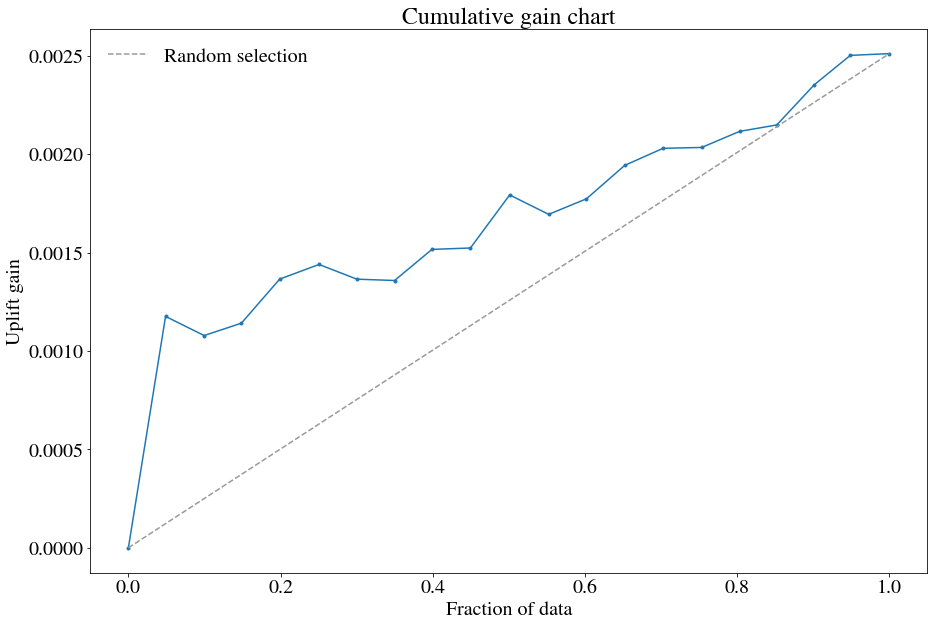

In [54]:
up.plot()

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Treatment balance curve'}, xlabel='Fraction of data', ylabel='Treatment size / (treatment size + control size)'>

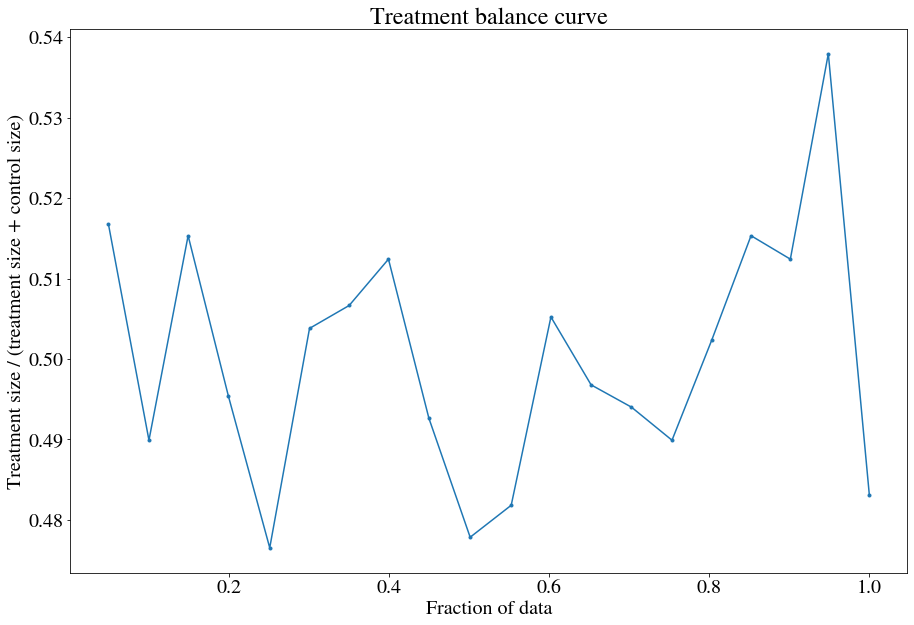

In [56]:
up.plot(plot_type = "balance")

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

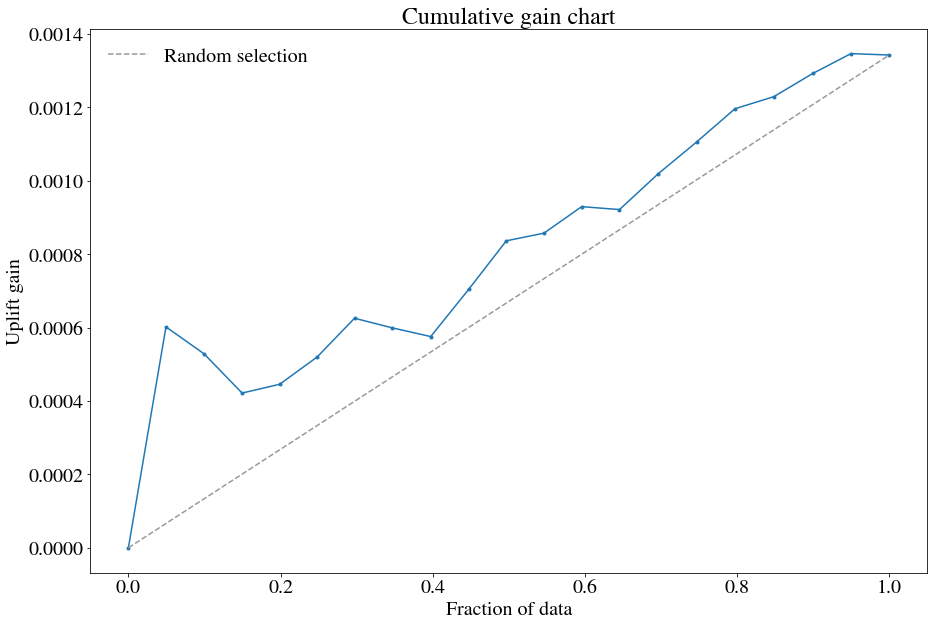

In [57]:
up.train_results_.plot()

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

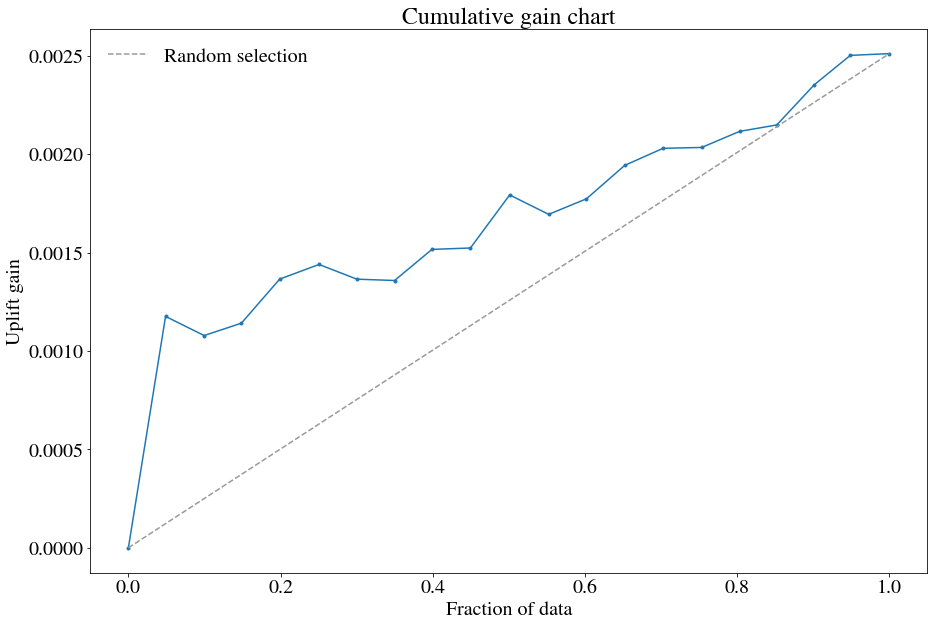

In [58]:
up.test_results_.plot()

<AxesSubplot:title={'center':'Adjusted Qini curve'}, xlabel='Fraction of data', ylabel='Uplift gain'>

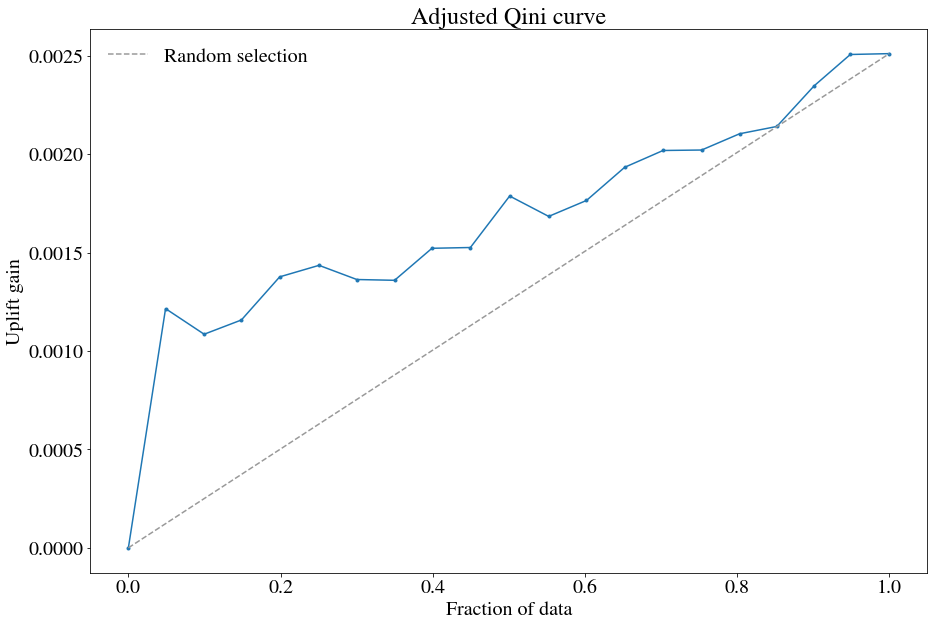

In [59]:
up.plot(plot_type = 'aqini')

# Shuffle data with multiple data splits and fitting to extract uncertainty

In [62]:
up.shuffle_fit(params = up.rand_search_.best_params_, nthread = 30, iterations = 5)

Seed 0 finished.
Seed 1 finished.
Seed 2 finished.
Seed 3 finished.
Seed 4 finished.


{0: <pylift.methods.derivatives.TransformedOutcome at 0x7f0d14e0d470>,
 1: <pylift.methods.derivatives.TransformedOutcome at 0x7f0d14dfdb38>,
 2: <pylift.methods.derivatives.TransformedOutcome at 0x7f0a9dd110b8>,
 3: <pylift.methods.derivatives.TransformedOutcome at 0x7f0d14911ef0>,
 4: <pylift.methods.derivatives.TransformedOutcome at 0x7f0d14e73f28>}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

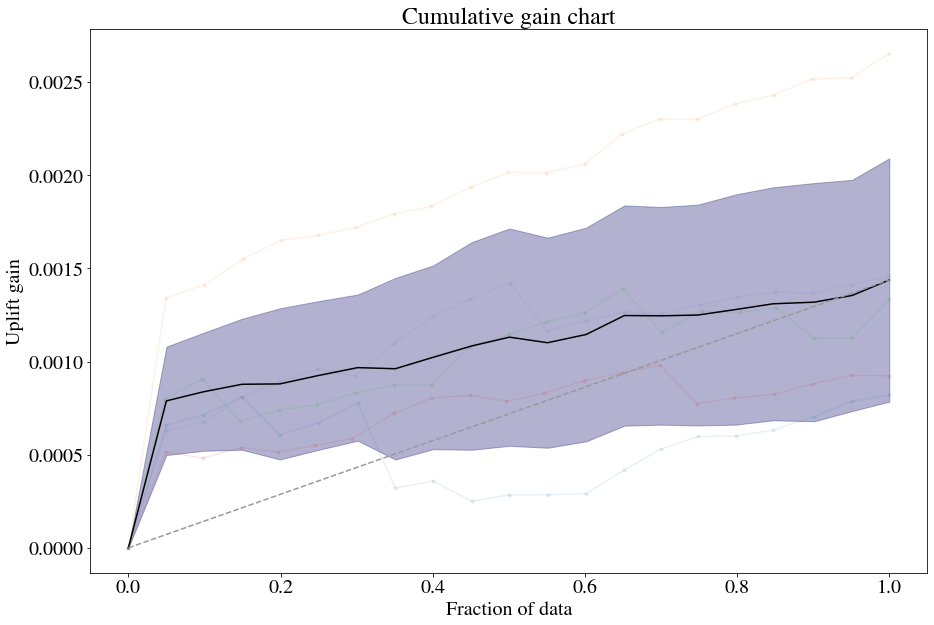

In [64]:
up.plot(show_shuffle_fits = True)

<AxesSubplot:title={'center':'Cumulative gain chart'}, xlabel='Fraction of data', ylabel='Uplift gain'>

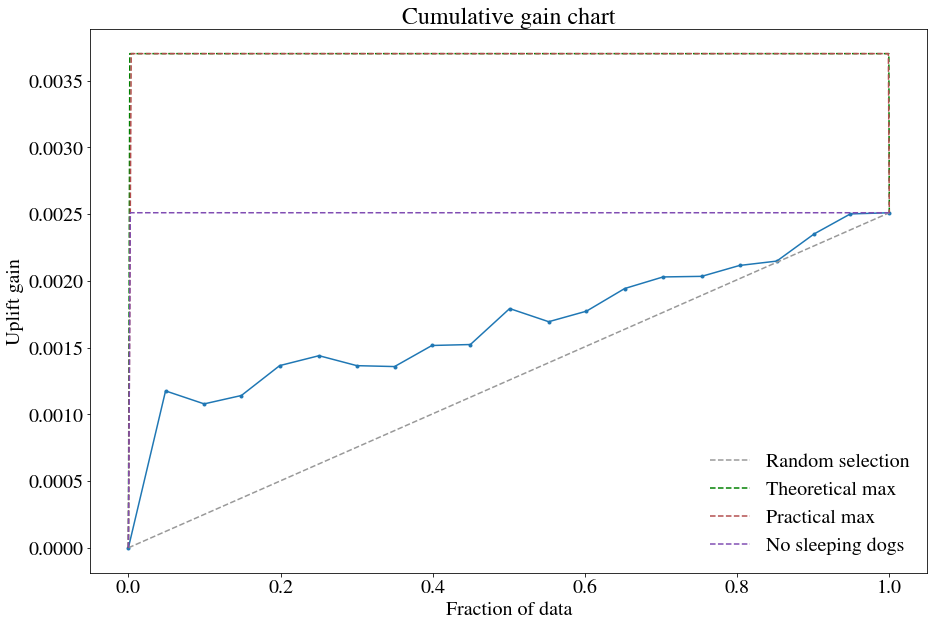

In [65]:
up.plot(show_theoretical_max=True, show_practical_max=True, show_no_dogs=True)


<AxesSubplot:title={'center':'Cumulative uplift curve'}, xlabel='Fraction of data', ylabel='Cumulative lift'>

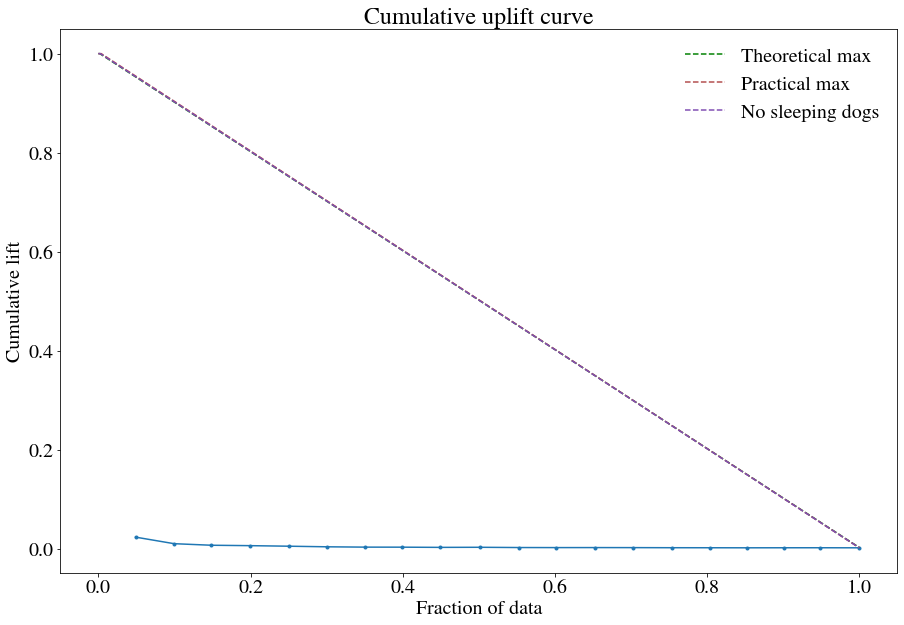

In [66]:
up.plot(plot_type='cuplift', show_theoretical_max=True, show_practical_max=True, show_no_dogs=True)